<a href="https://colab.research.google.com/github/Aanchal-01/FinalProject/blob/main/RESNET_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASSIFICATION OF COVID-19 AND PNEUMONIA USING CNN

STEP 1 : DOWNLOADING DATA INTO GOOGLE COLAB

In [ ]:
#Downloading the data to google colab
#The wget command allows to download files from the internet.

!wget https://data.mendeley.com/datasets/dvntn9yhd2/1/files/94f6960b-d602-4936-a36b-4442ac17c564/Covid19-Pneumonia-NormalChestX-RayImagesDataset.zip
!unzip Covid19-Pneumonia-NormalChestX-RayImagesDataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID/COVID_1203.png    
  inflating: COVID/COVID_1204.png    
  inflating: COVID/COVID_1205.png    
  inflating: COVID/COVID_1206.png    
  inflating: COVID/COVID_1207.png    
  inflating: COVID/COVID_1208.png    
  inflating: COVID/COVID_1209.png    
  inflating: COVID/COVID_121.png     
  inflating: COVID/COVID_1210.png    
  inflating: COVID/COVID_1211.png    
  inflating: COVID/COVID_1212.png    
  inflating: COVID/COVID_1213.png    
  inflating: COVID/COVID_1214.png    
  inflating: COVID/COVID_1215.png    
  inflating: COVID/COVID_1216.png    
  inflating: COVID/COVID_1217.png    
  inflating: COVID/COVID_1218.png    
  inflating: COVID/COVID_1219.png    
  inflating: COVID/COVID_122.png     
  inflating: COVID/COVID_1220.png    
  inflating: COVID/COVID_1221.png    
  inflating: COVID/COVID_1222.png    
  inflating: COVID/COVID_1223.png    
  inflating: COVID/COVID_1224.png    
  inflating: COVID/COVID_1225.png    

Google Colab provides its own directory where we can store and access files.  The default directory in Google Colab is '/content'. Inside "content", we mount our google drive.

In [ ]:

from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder #data load garna help garxa
import torchvision.transforms as t
import os

STEP 2: ORGANIZING DOWNLOADED DATA INTO FOLDERS

In [ ]:
!mkdir /content/Data #data lai move/rename garna use hunxa sudo le..mkdir le make directory

In [ ]:
!sudo mv COVID /content/Data #directtory ho sudo vaneko

In [ ]:
!sudo mv NORMAL /content/Data

In [ ]:
!sudo mv PNEUMONIA /content/Data

STEP 3: LOADING DATA AND TRANSFORMING DATA TO TENSOR, CREATING DATALOADERS AND DATA BATCHES TO VISUALIZE OUR DATASET

In [ ]:
Dataset = ImageFolder("/content/Data",transform = t.Compose([
   t.Resize((224,224)),
   t.ToTensor()]))


In [ ]:
our_dataloader = DataLoader(Dataset, batch_size=32, shuffle=True)


In [ ]:
our_batch = next(iter(our_dataloader)) #total data/32

In [ ]:
our_batch

[tensor([[[[0.0784, 0.0784, 0.0784,  ..., 0.2078, 0.2157, 0.2118],
           [0.0706, 0.0667, 0.0627,  ..., 0.2078, 0.2078, 0.2157],
           [0.0784, 0.0549, 0.0471,  ..., 0.1922, 0.1961, 0.2078],
           ...,
           [0.5059, 0.5294, 0.6000,  ..., 0.2118, 0.2314, 0.2510],
           [0.4902, 0.5137, 0.5922,  ..., 0.2157, 0.2392, 0.2510],
           [0.4706, 0.5098, 0.5961,  ..., 0.2196, 0.2353, 0.2549]],
 
          [[0.0784, 0.0784, 0.0784,  ..., 0.2078, 0.2157, 0.2118],
           [0.0706, 0.0667, 0.0627,  ..., 0.2078, 0.2078, 0.2157],
           [0.0784, 0.0549, 0.0471,  ..., 0.1922, 0.1961, 0.2078],
           ...,
           [0.5059, 0.5294, 0.6000,  ..., 0.2118, 0.2314, 0.2510],
           [0.4902, 0.5137, 0.5922,  ..., 0.2157, 0.2392, 0.2510],
           [0.4706, 0.5098, 0.5961,  ..., 0.2196, 0.2353, 0.2549]],
 
          [[0.0784, 0.0784, 0.0784,  ..., 0.2078, 0.2157, 0.2118],
           [0.0706, 0.0667, 0.0627,  ..., 0.2078, 0.2078, 0.2157],
           [0.0784, 0.05

In [ ]:
our_images = our_batch[0] #batch[0] --> consists of input tensors and batch[1] consists of corresponding labels
our_labels = our_batch[1]

In [ ]:
our_labels # 0=covid 1=normal 2=pneumonia

tensor([2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 2])

In [ ]:
label_names = [Dataset.classes[label] for label in our_labels]

print(label_names)

['PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'COVID', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'COVID', 'COVID', 'COVID', 'COVID', 'NORMAL', 'COVID', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'COVID', 'COVID', 'NORMAL', 'COVID', 'NORMAL', 'COVID', 'COVID', 'COVID', 'PNEUMONIA']


VISUALIZING ORIGINAL DATASET

labels : tensor([2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 2])


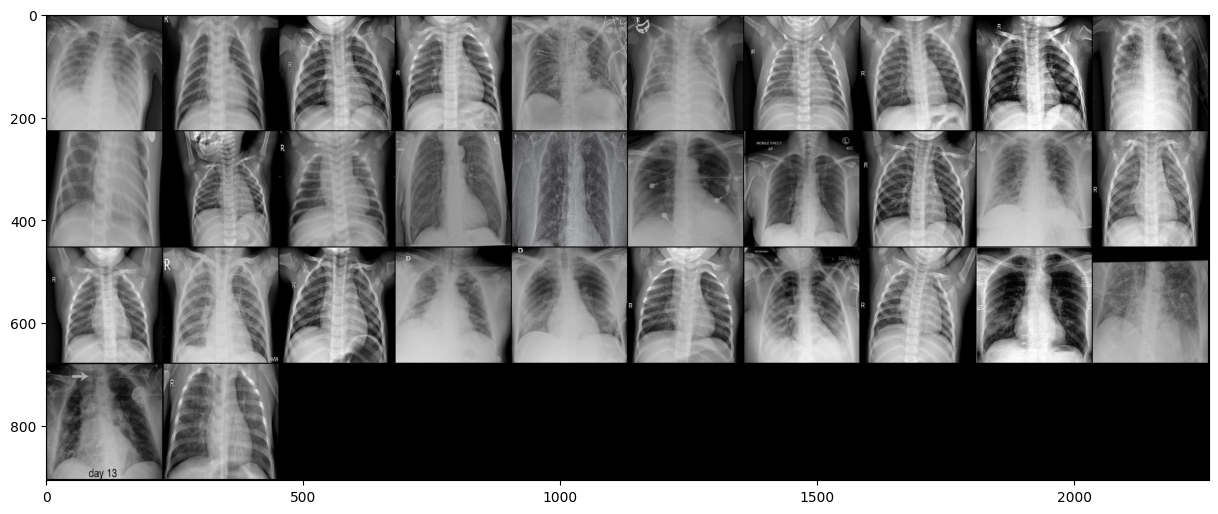

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision        #image ma height, weight, channel hunxa...matplotlib le teslai accept gardaina so transform garne in pytorch
grid = torchvision.utils.make_grid(our_images,nrow=10)
plt.figure(figsize=(15,15)) #width and height
plt.imshow(np.transpose(grid,(1,2,0))) #width, channels and height grid le thau banayo. plt.figure le figure banayo. 0 channel. indexing
print(f"labels : {our_labels}")

STEP 4: TRANSFORMING DATA

In [ ]:
Dataset = ImageFolder("/content/Data",transform = t.Compose([
   t.Resize((224,224)),
   t.ToTensor(),
   t.RandomVerticalFlip(),
   t.RandomHorizontalFlip(),
   t.RandomRotation(10),
   #t.Normalize([0.1, 0.1, 0.1], [0.1, 0.1, 0.1]), did not yield good results
  ]))

In [ ]:
len(Dataset)

5228

STEP 5: RANDOMLY SPLITTING DATA INTO DESIRED "TRAIN AND TEST RATIO"

In [ ]:
import torch
torch.manual_seed(1234) #setting up seed
import random #randomly data pull garxa
import numpy as np

# Set random seeds for both CPU and CUDA to make sure that all the operations implemented using cuda or cpu use the same random seed.
#cudnn = CUDA Deep Neural Network library
seed_value = 1234
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed(seed_value)
torch.backends.cudnn.deterministic = True #Ensure that the operations performed by CuDNN are deterministic.
torch.backends.cudnn.benchmark = False #PyTorch does not search for the optimal algorithm during the first run and instead use a deterministic algorithm.

#"deterministic algorithm" refers to an algorithm that produces the same output given the same input and configuration, regardless of the number of times it is executed.

torch.backends.cudnn.deterministic = True....
Ensure that the operations performed by CuDNN are deterministic. This means that if you run your code multiple times with the same input and settings, you will always get the same results. This is useful for reproducibility.
torch.backends.cudnn.benchmark = False....
CuDNN can optimize convolution algorithms based on the input size and hardware configuration. By disabling the benchmark, you are instructing PyTorch not to search for the optimal algorithm during the first run and instead use a deterministic algorithm. This can help ensure consistent performance across different runs. Used together to achieve deterministic behavior in deep learning models, ensuring consistent results when training and evaluating the models.

In [ ]:
from torch.utils.data import random_split #each time, same images get splitted

In [ ]:
train_size = int(len(Dataset) * 0.9)

In [ ]:
train_size

4705

In [ ]:
train_set, val_set = random_split(Dataset, [train_size, len(Dataset) - train_size]) #split(5228,[4705,523]) val_set = test_set

visualizing the train set


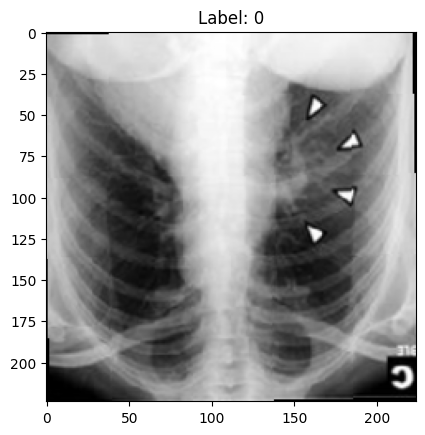

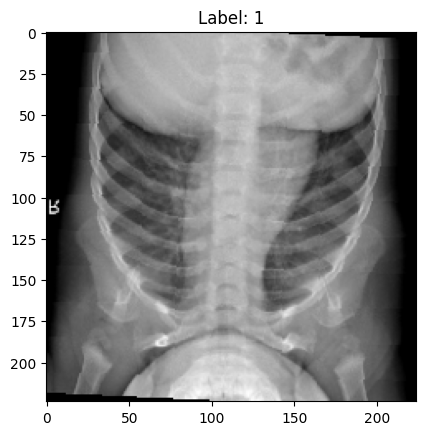

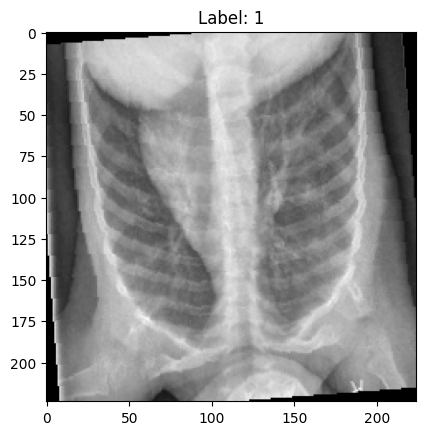

In [ ]:
print("visualizing the train set")
import matplotlib.pyplot as plt
import numpy as np

for i in range(3): #showing 3 images
    image, label = train_set[i]  # get the i-th image and label  train_set[0]
    image = np.transpose(image, (1, 2, 0))  # transpose the image data to (width, channels and height)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()


visualizing the test set


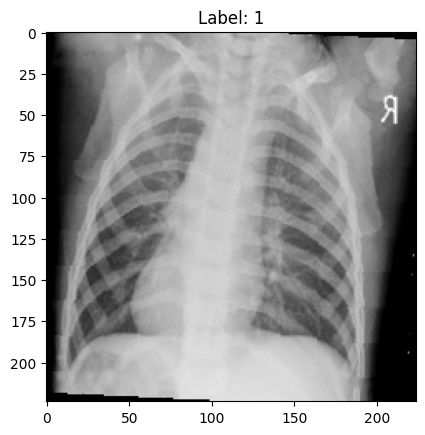

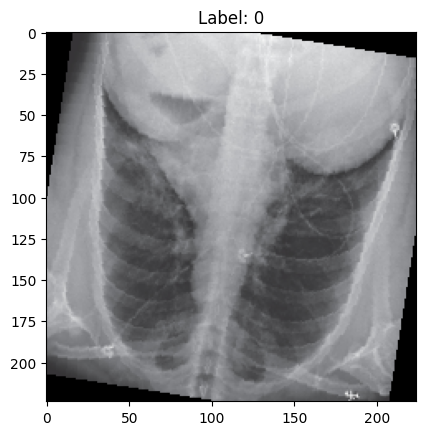

In [ ]:
print("visualizing the test set")
import matplotlib.pyplot as plt
import numpy as np

for i in range(2):
    image, label = val_set[i]  # get the i-th image and label
    image = np.transpose(image, (1, 2, 0))  # transpose the image data to width, channels, height)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()

In [ ]:
!mkdir /content/Split_Data

In [ ]:
dataset_dir = "/content/Split_Data"
train_dir = os.path.join(dataset_dir, "train")  #mathi ko dataset_dir ma \train halde
val_dir = os.path.join(dataset_dir, "test")
os.makedirs(train_dir, exist_ok=True) #makes dir train_dir and allows the code to continue without raising an error if the directory is already present.
os.makedirs(val_dir, exist_ok=True)

In [ ]:
print(len(train_set))
print(len(val_set))

4705
523


Saving split images in content directory of colab

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToPILImage

In [ ]:
# Save the images in the train set
for i in range(len(train_set)):
    image, label = train_set[i]  # get the i-th image and label (are index)
    image = ToPILImage()(image)  # convert tensor to PIL image
    label_dir = os.path.join(train_dir, str(label))  # create the label directory
    os.makedirs(label_dir, exist_ok=True)
    filename = os.path.join(label_dir, f"{i}.png")  # create the filename
    image.save(filename)  # save the image

In [ ]:
# Save the images in the test set
for i in range(len(val_set)):
    image, label = val_set[i]  # get the i-th image and label
    image = ToPILImage()(image)  # convert tensor to PIL image
    label_dir = os.path.join(val_dir, str(label))  # create the label directory
    os.makedirs(label_dir, exist_ok=True)
    filename = os.path.join(label_dir, f"{i}.png")  # create the filename
    image.save(filename)  # save the image

In [ ]:
print("Details of images inside train set \n") # Get the list of files in the folder

files0 = os.listdir("/content/Split_Data/train/0") # Print the number of images
print("Number of images in folder 0:", len(files0))

files1 = os.listdir("/content/Split_Data/train/1")
print("Number of images in folder 1:", len(files1))

files2 = os.listdir("/content/Split_Data/train/2")
print("Number of images in folder 2:", len(files2))

print("Total test images:", len(files0) + len(files1) + len(files2))

Details of images inside train set 

Number of images in folder 0: 1456
Number of images in folder 1: 1631
Number of images in folder 2: 1618
Total test images: 4705


In [ ]:
print("Details of images inside test set \n")

# Get the list of files in the folder
files01 = os.listdir("/content/Split_Data/test/0")

# Print the number of images
print("Number of images in folder 0:", len(files01))

files11 = os.listdir("/content/Split_Data/test/1")
print("Number of images in folder 1:", len(files11))

files21 = os.listdir("/content/Split_Data/test/2")
print("Number of images in folder 2:", len(files21))

print("Total test images:", len(files01) + len(files11) + len(files21))

Details of images inside test set 

Number of images in folder 0: 170
Number of images in folder 1: 171
Number of images in folder 2: 182
Total test images: 523


In [ ]:
#CREATING TRAIN AND TEST DATALOADERS
train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True)
test_dataloader = DataLoader(val_set, batch_size=32, shuffle=False)

In [ ]:
len(train_dataloader) #4705/32

148

In [ ]:
len(test_dataloader) #523/32

17

In [ ]:
train_batch = next(iter(train_dataloader))

In [ ]:
train_images=train_batch[0] #0 banayera image ma haleko
train_labels=train_batch[1]

In [ ]:
train_labels


tensor([2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0,
        0, 0, 2, 2, 2, 2, 2, 2])

In [ ]:
print(f"Shape of image is :{train_images.shape}") #[batch_size, channels, height, width]
print(f"Shape of label is :{train_labels.shape}")
#pytorch expects images with 3 channels because
#many pre-trained models and common image transformation operations in PyTorch are designed to handle RGB images with three channels.
#so pytorch expands the grayscale image to into three identical channels to match the expected input format.
#Each of the three channels will contain the same pixel values as the original grayscale image.'''

Shape of image is :torch.Size([32, 3, 224, 224])
Shape of label is :torch.Size([32])


VISUALIZING TRAINING DATASET AFTER TRANSFORMATION

labels : tensor([2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0,
        0, 0, 2, 2, 2, 2, 2, 2])


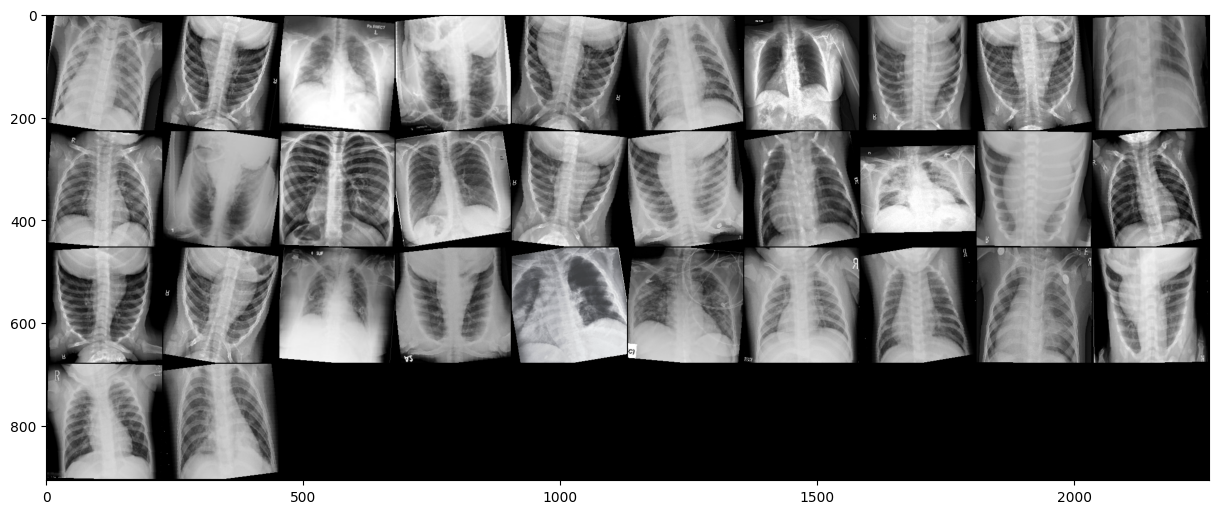

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
grid = torchvision.utils.make_grid(train_images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"labels : {train_labels}")

In [ ]:
test_batch = next(iter(test_dataloader))

In [ ]:
test_images=test_batch[0]
test_labels=test_batch[1]

In [ ]:
print(f"Shape of test image is :{test_images.shape}")
print(f"Shape of test label is :{test_labels.shape}")

Shape of test image is :torch.Size([32, 3, 224, 224])
Shape of test label is :torch.Size([32])


VISUALIZING TESTING DATASET AFTER TRANSFORMATION

test labels : tensor([1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0,
        0, 1, 2, 1, 0, 2, 0, 1])


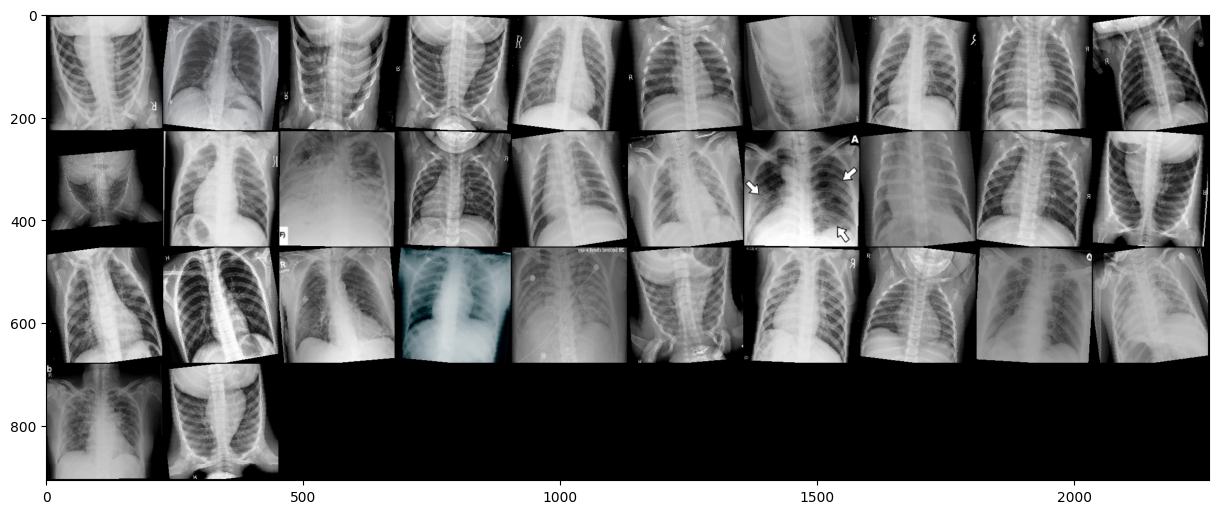

In [ ]:
grid = torchvision.utils.make_grid(test_images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"test labels : {test_labels}")

# Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim #various optimixation algorithms
import torchvision

In [ ]:
model = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 164MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
num_ftrs = model.fc.in_features #returns number of neurons from the last layer of our model network; fc=fully connected layer

model.classifier = nn.Linear(num_ftrs, 3) #adding one extra layer to fit our problem with 3 neurons in last layer(output layer)
print(model)

'''# Replace the last fully connected layer with a softmax layer
num_ftrs = model.fc.in_features
model.classifier = nn.Softmax(dim=0)
#model.fc = nn.Softmax(dim=1)

print(model)'''




ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

'# Replace the last fully connected layer with a softmax layer\nnum_ftrs = model.fc.in_features\nmodel.classifier = nn.Softmax(dim=0)\n#model.fc = nn.Softmax(dim=1)\n\nprint(model)'

In [ ]:
num_ftrs

512

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #CUDA (Compute Unified Device Architecture)
#cuda enables programmers to write and execute code on NVIDIA GPUs accelerate computations in deep learning

In [ ]:
model = model.to(device)

In [ ]:
def correct_preds(preds,targets):
    # print("PREDS are", preds)
    # print("Targets are", targets)
    # print("preds.argmax(dim=1)", preds.argmax(dim=1))
    # print("preds.argmax(dim=1).eq(targets)", preds.argmax(dim=1).eq(targets))
    # print("preds.argmax(dim=1).eq(targets).sum()", preds.argmax(dim=1).eq(targets).sum())

    return preds.argmax(dim=1).eq(targets).sum().item()

#actual ra pred ma kati ota milyo vanera sum nikaleko
'''calculates the number of correct predictions by comparing the predicted classes (obtained by taking
the index of the maximum value in the predicted tensor) with the true target values. It counts the number of correct predictions and returns it as an integer value.'''

'calculates the number of correct predictions by comparing the predicted classes (obtained by taking \nthe index of the maximum value in the predicted tensor) with the true target values. It counts the number of correct predictions and returns it as an integer value.'

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
criterion = nn.CrossEntropyLoss() #pytorch ma yo use gare paxi afai softmax haldinxa
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
metrics = []
best_accuracy = 0
best_test_accuracy = 0
best_confusion_matrix = None

for epoch in range(10):
    total_correct = 0
    total_loss = 0
    total_test_loss = 0
    total_test_correct = 0
    val_true_labels = []
    val_pred_labels = []

    for i, (images, targets) in enumerate(train_dataloader):
        images = images.to(device)
        targets = targets.to(device)

        preds = model(images)
        loss = criterion(preds, targets)
        total_loss += loss.item() #.item converts the tensor to a single scalar value
        optimizer.zero_grad() #set the gradients of all the parameters in the optimizer to zero. It is typically called before computing the gradients for a new minibatch of training data.
        loss.backward() #computes the gradients of the loss function with respect to the model's parameters using backpropagation.
        optimizer.step() # updates the model's parameters based on the computed gradients. It is typically called after the backward pass (gradient computation) to perform the parameter update step during the training process.
        total_correct += correct_preds(preds, targets) #calling above function

    avg_loss = total_loss / len(train_dataloader)
    accuracy = (total_correct / len(train_set)) * 100

    model.eval() #sets model to evaluation mode. model's behavior is altered to perform or evaluation tasks. altering as in disabling certain operations or modules.
    with torch.no_grad(): #disables gradient calculations and updates. when you don't need to compute gradients for backward propagation or update model parameters. Useful during evaluation.
        for j, (test_images, test_targets) in enumerate(test_dataloader):
            test_images = test_images.to(device)
            test_targets = test_targets.to(device)

            test_preds = model(test_images)
            test_loss = criterion(test_preds, test_targets)
            total_test_loss += test_loss.item()
            total_test_correct += correct_preds(test_preds, test_targets)
            avg_test_loss = total_test_loss / len(test_dataloader)
            test_accuracy = (total_test_correct / len(val_set)) * 100

            # get predicted and true labels for the current batch
            val_true_labels += test_targets.tolist()
            val_pred_labels += test_preds.argmax(dim=1).tolist()

        # calculate confusion matrix for the current epoch
        confusion_matrix_epoch = confusion_matrix(val_true_labels, val_pred_labels)

        if (test_accuracy >= best_test_accuracy):
            best_test_accuracy = test_accuracy
            best_accuracy = accuracy
            best_confusion_matrix = confusion_matrix_epoch

    model.train()

    # model save

    folder_name = "/content/drive/MyDrive/modelsaved_ep_10_lr_0.0001"
    if not (os.path.exists(folder_name)):
        os.mkdir(folder_name)
    model_name = folder_name + "/epoch_number_" + str(epoch) + ".pth"
    torch.save(model, model_name)
    print(
        "Epoch:", epoch, "Train-loss:", avg_loss, "Train-accuracy:", accuracy, "Test-loss:", avg_test_loss, "Test-accuracy:", test_accuracy,
    )
    metrics_dict = {
        "Epoch": epoch,
        "Train-loss": avg_loss,
        "Train-accuracy": accuracy,
        "Test-loss": avg_test_loss,
        "Test-accuracy": test_accuracy,
    }
    metrics.append(metrics_dict)

# print the confusion matrix for the epoch with the best accuracy and test_accuracy
print("Best train accuracy:", best_accuracy)
print("Best test accuracy:", best_test_accuracy)




Epoch: 0 Train-loss: 0.7781354537472833 Train-accuracy: 89.33049946865037 Test-loss: 0.45508041101343494 Test-accuracy: 90.63097514340345
Epoch: 1 Train-loss: 0.13339204359264742 Train-accuracy: 96.59936238044634 Test-loss: 0.11699221688596641 Test-accuracy: 96.74952198852772
Epoch: 2 Train-loss: 0.11116695033411521 Train-accuracy: 97.19447396386822 Test-loss: 0.2619088144205949 Test-accuracy: 93.30783938814533
Epoch: 3 Train-loss: 0.09675195569178795 Train-accuracy: 97.53453772582358 Test-loss: 0.11224395579055828 Test-accuracy: 97.51434034416826
Epoch: 4 Train-loss: 0.07956056777903861 Train-accuracy: 97.49202975557917 Test-loss: 0.09271074593176737 Test-accuracy: 97.131931166348
Epoch: 5 Train-loss: 0.07268718104161373 Train-accuracy: 98.12964930924548 Test-loss: 0.0806570471100071 Test-accuracy: 97.70554493307839
Epoch: 6 Train-loss: 0.06466959346545155 Train-accuracy: 98.25717321997874 Test-loss: 0.10695712958626888 Test-accuracy: 96.74952198852772
Epoch: 7 Train-loss: 0.063727250

In [ ]:
print(best_confusion_matrix)

[[170   0   0]
 [  0 169   2]
 [  2   8 172]]


In [ ]:
print("Classification report for epoch=10 lr=0.0001 \n")
print(classification_report(val_true_labels, val_pred_labels))


Classification report for epoch=10 lr=0.0001 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       170
           1       0.95      0.99      0.97       171
           2       0.99      0.95      0.97       182

    accuracy                           0.98       523
   macro avg       0.98      0.98      0.98       523
weighted avg       0.98      0.98      0.98       523



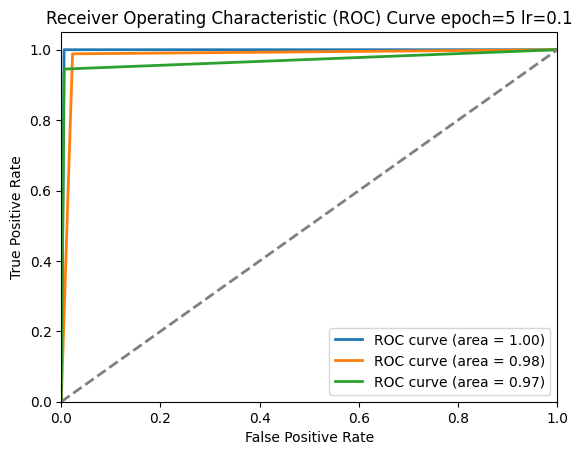

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert the confusion matrix to a binary confusion matrix
n_classes = confusion_matrix_epoch.shape[0]
y_true = label_binarize(val_true_labels, classes=[i for i in range(n_classes)])
y_pred = label_binarize(val_pred_labels, classes=[i for i in range(n_classes)])

# Calculate the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve epoch=5 lr=0.1')
plt.legend(loc="lower right")
plt.show()


CONFUSION MATRIX FOR TEST ACCURACY

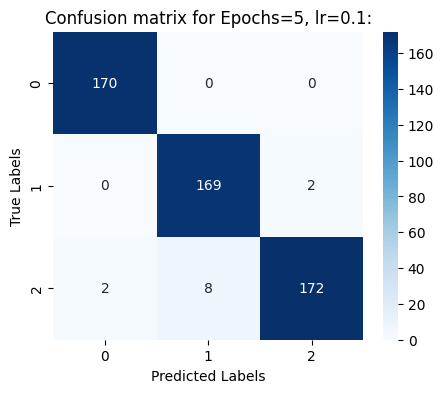

In [ ]:

import seaborn as sns
plt.figure(figsize=(5,4))
plt.title("Confusion matrix for Epochs=5, lr=0.1:")
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
metrics

[{'Epoch': 0,
  'Train-loss': 0.7781354537472833,
  'Train-accuracy': 89.33049946865037,
  'Test-loss': 0.45508041101343494,
  'Test-accuracy': 90.63097514340345},
 {'Epoch': 1,
  'Train-loss': 0.13339204359264742,
  'Train-accuracy': 96.59936238044634,
  'Test-loss': 0.11699221688596641,
  'Test-accuracy': 96.74952198852772},
 {'Epoch': 2,
  'Train-loss': 0.11116695033411521,
  'Train-accuracy': 97.19447396386822,
  'Test-loss': 0.2619088144205949,
  'Test-accuracy': 93.30783938814533},
 {'Epoch': 3,
  'Train-loss': 0.09675195569178795,
  'Train-accuracy': 97.53453772582358,
  'Test-loss': 0.11224395579055828,
  'Test-accuracy': 97.51434034416826},
 {'Epoch': 4,
  'Train-loss': 0.07956056777903861,
  'Train-accuracy': 97.49202975557917,
  'Test-loss': 0.09271074593176737,
  'Test-accuracy': 97.131931166348},
 {'Epoch': 5,
  'Train-loss': 0.07268718104161373,
  'Train-accuracy': 98.12964930924548,
  'Test-loss': 0.0806570471100071,
  'Test-accuracy': 97.70554493307839},
 {'Epoch': 6,
 

In [ ]:
print(avg_loss)
print(len(metrics))

0.06156590021202794
10


In [ ]:
metrics_epochs = []
metrics_trainacc = []
metrics_testacc = []
metrics_trainloss = []
metrics_testloss = []
for k in range(len(metrics)):
  metrics_epochs.append(metrics[k]['Epoch'])
  metrics_trainacc.append(metrics[k]['Train-accuracy'])
  metrics_trainloss.append(metrics[k]['Train-loss'])
  metrics_testacc.append(metrics[k]['Test-accuracy'])
  metrics_testloss.append(metrics[k]['Test-loss'])



In [ ]:
print(metrics_epochs)
print(metrics_trainacc)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[89.33049946865037, 96.59936238044634, 97.19447396386822, 97.53453772582358, 97.49202975557917, 98.12964930924548, 98.25717321997874, 98.25717321997874, 98.51222104144527, 98.53347502656749]


In [ ]:
print(metrics_trainloss)

[0.7781354537472833, 0.13339204359264742, 0.11116695033411521, 0.09675195569178795, 0.07956056777903861, 0.07268718104161373, 0.06466959346545155, 0.06372725059879264, 0.05038488630541267, 0.06156590021202794]


EPOCHS VS TRAIN AND TEST ACCURACY


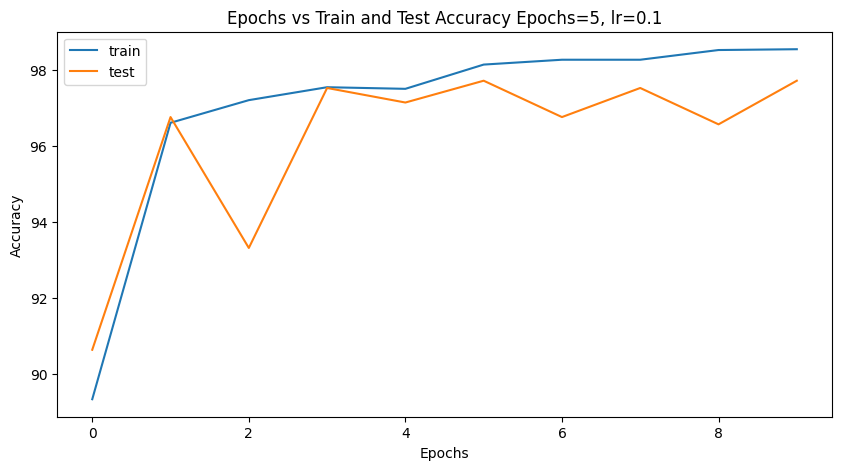

In [ ]:
plt.figure(figsize=(10,5)) #trainiang loss
plt.title("Epochs vs Train and Test Accuracy Epochs=5, lr=0.1")
plt.plot(metrics_epochs,metrics_trainacc, label="train")
plt.plot(metrics_epochs, metrics_testacc, label="test")
plt.xlim()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


EPOCHS VS TRAIN AND TEST LOSS


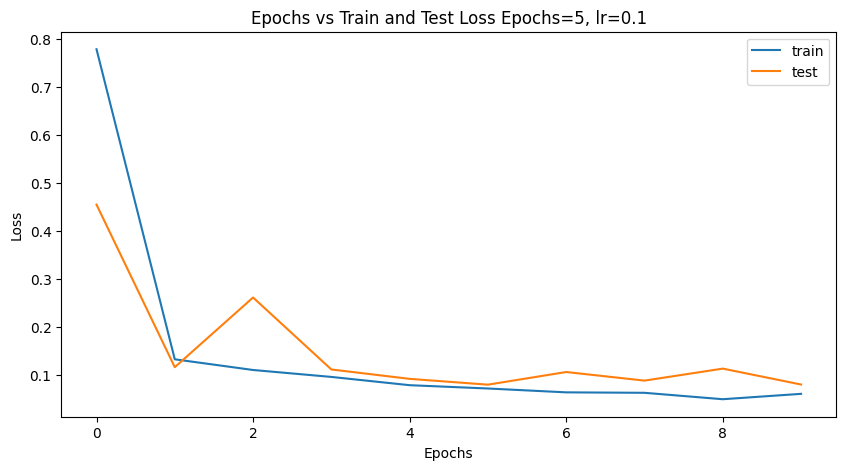

In [ ]:
plt.figure(figsize=(10,5)) #trainiang loss
plt.title("Epochs vs Train and Test Loss Epochs=5, lr=0.1")
plt.plot(metrics_epochs,metrics_trainloss, label="train")
plt.plot(metrics_epochs, metrics_testloss, label="test")
plt.xlim()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
